In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. The Wien displacement law

<br>

Before the Planck radiation law, describing the spectral density of radiation emitted by a black body in equilibrium, was derived, others had noted that peak of the distribution changed as a function of temperature.

This is the reason, for example, why a piece of metal glows 'red hot' at certain temperatures, but at very high temperatures glows 'white hot'.

Wilhelm Wien derived a relationship between temperature and the wavelength at which the black body spectral radiance peaks
$$ \lambda_{max} = \frac{b}{T}$$
where $b$ is the _Wien displacement constant_.

Later, the Planck radiation law gave an exact expression for the black body spectral radiance at a given temperature and wavelength:

$$ u_\lambda (\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{e^{h c / \lambda k_B T} - 1} $$

In this exercise, we will use the Planck expression to estimate the value of $b$.



<br> 
### Exercise 1
Define a function which returns the Planck radiation law as a function of wavelength and temperature

Plot the curve (in the range $10<\lambda<2000$ nm) for several values of temperature in the range $3000$ K $< 9000$ K .

In [2]:
from scipy import constants
h = constants.Planck
c = constants.speed_of_light
kB = constants.Boltzmann

def planck(wl, temp):
    return ( 2 * h * c**2 / wl**5) / (np.exp(h*c / (wl * kB * temp)) -1 )
#wl = wavelength

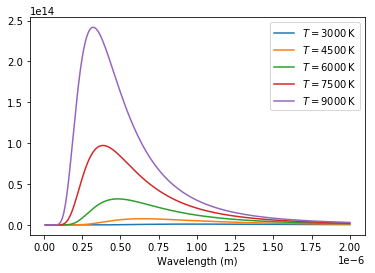

In [3]:
wls = np.linspace(1E-8, 2E-6, 200)
Ts = np.linspace(3000, 9000, 5)

fig, ax = plt.subplots()
for temp in Ts:
    ax.plot(wls, planck(wls, temp), label=r'$T='+str(int(temp))+'\,\mathrm{K}$') 
          
        
ax.ticklabel_format(axis='both', style='sci', scilimits=(-3,3))
ax.set_xlabel('Wavelength (m)')
ax.legend()
plt.show()

### Exercise 2
Write a function which uses the scipy library to find the wavelength for which the Planck expression is maximum at a given temperature.
Replot the figure above, this time also indicating the maximum point


In [4]:
from scipy.optimize import minimize_scalar

In [5]:
# way to find max is to find min of minus the original function

def planck2(wl, temp):
    return -planck(wl, temp)

def find_max_wl(temp):
    fmin = minimize_scalar(planck2, bracket = (0.2E-7, 2.0E-6), args = (temp))
    return fmin.x, -fmin.fun

In [6]:
##positions of maxima for each T
maxwl, maxfn = np.zeros_like(Ts), np.zeros_like(Ts)

for i, temp in enumerate(Ts):
    maxwl[i], maxfn[i] = find_max_wl(temp)

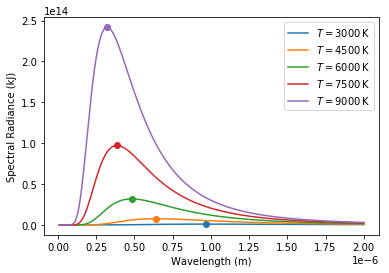

In [7]:
fig, ax = plt.subplots()
for i, temp in enumerate(Ts):
    line, = ax.plot(wls, planck(wls, temp), label=r'$T='+str(int(temp))+'\,\mathrm{K}$') 
    dot, = ax.plot(maxwl[i], maxfn[i], 'o', color=line.get_color())
          
        
ax.ticklabel_format(axis='both', style='sci', scilimits=(-3,3))
ax.set_xlabel('Wavelength (m)')
ax.set_ylabel('Spectral Radiance (kJ)')
ax.legend()
plt.show()

## Homework Q2

Use the function defined above to generate a longer set of $T$ and corresponding $\lambda_{max}$ values in the same range.

Use least square fitting methods in scipy to estimate the Wien displacement constant $b$.

Plot the fit, and compare the esimated and true values of $b$.

In [8]:
# Need to make a longer list of possible temperature values.
# Example above uses only 5 temperature values - need more than this for the fit.

from scipy.optimize import leastsq

In [9]:
T2s = np.linspace(3000, 9000, 200)

#max values

maxwl2, maxfn2 = np.zeros_like(T2s), np.zeros_like(T2s)

for i, temp in enumerate(T2s):
    maxwl2[i], maxfn2[i] = find_max_wl(temp)

In [16]:
#function we are fitting to
def fun_to_fit(T, b):
    return b/T

#define the residuals function (difference between model and data)
def residuals(b, wl, T):
    return wl - fun_to_fit(T,b)

W = constants.Wien
true_y = fun_to_fit(T2s, W)
y_fit = maxwl2

In [20]:
#perform the fitting
p0 = 0.001
fitting = leastsq(residuals, p0, args=(y_fit, T2s))
print(fitting[0][0], W)
fitted_y = fun_to_fit(T2s, fitting[0][0])

0.00289777258802 0.0028977729


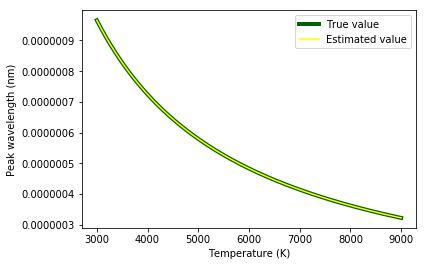

In [61]:
fig, ax = plt.subplots()

ax.plot(T2s, true_y, 'darkgreen', linewidth=4, label='True value')
#ax.plot(T2s, y_fit, 'yellow', linewidth=2.5, label='')
ax.plot(T2s, fitted_y, 'yellow', linewidth=1.5, label='Estimated value')

ax.set_ylabel('Peak wavelength (nm)')
ax.set_xlabel('Temperature (K)')
ax.legend()
plt.show()

In [62]:
fig.savefig('wien_plot.png', bbox_inches='tight', dpi=200)